In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import my_library.constants as constants

In [2]:
path_to_nominal = '/work/halld/home/viducic/data/fit_params/{}/tf1_gaus_cross_section_values.csv'
path_to_bootstrapped = '/work/halld/home/viducic/data/fit_params/{}/bootstrap_amplitudes.csv'

df_nominal_pipkmks = pd.read_csv(path_to_nominal.format('pipkmks'))
df_nominal_pimkpks = pd.read_csv(path_to_nominal.format('pimkpks'))
df_bootstrapped_pipkmks = pd.read_csv(path_to_bootstrapped.format('pipkmks'))
df_bootrapped_pimkpks = pd.read_csv(path_to_bootstrapped.format('pimkpks'))

df_bootstrapped_pipkmks = df_bootstrapped_pipkmks[df_bootstrapped_pipkmks['amplitude'] > 0.1]
df_bootrapped_pimkpks = df_bootrapped_pimkpks[df_bootrapped_pimkpks['amplitude'] > 0.1]

bs_grouped_pipkmks = df_bootstrapped_pipkmks.groupby(['e_bin', 't_bin'])
bs_grouped_pimkpks = df_bootrapped_pimkpks.groupby(['e_bin', 't_bin'])

df_nominal_pipkmks['rel_err'] = np.where(True, df_nominal_pipkmks['yield_error']/df_nominal_pipkmks['yield'], 0)
df_nominal_pimkpks['rel_err'] = np.where(True, df_nominal_pimkpks['yield_error']/df_nominal_pimkpks['yield'], 0)


In [3]:
# print(df_bootstrapped_pipkmks[df_bootstrapped_pipkmks['t_bin'] == 7].to_markdown())

In [4]:
dict_pipkmks = {'e':[], 't':[], 'nom_rel_err':[], 'bs_rel_err':[]}
for (e, t), group in bs_grouped_pipkmks:
    mean = group['amplitude'].mean()
    std = group['amplitude'].std()
    # print(mean)
    # print(std)
    bs_rel_err = (std / mean)*100

    t_middle = constants.T_CUT_DICT[t][0] + (constants.T_WIDTH_DICT[t] / 2)
    nom_rel_err = df_nominal_pipkmks[(df_nominal_pipkmks['beam_energy'] == e) & (df_nominal_pipkmks['t_bin_middle'] == t_middle)]['rel_err'].values[0] * 100

    dict_pipkmks['e'].append(e)
    dict_pipkmks['t'].append(t)
    dict_pipkmks['nom_rel_err'].append(nom_rel_err)
    dict_pipkmks['bs_rel_err'].append(bs_rel_err)

    # print(f'pipkmks: e={e}, t={t}, nom_rel_err={nom_rel_err}, bs_rel_err={bs_rel_err}, REL_DIFF = {bs_rel_err/nom_rel_err}')

In [5]:
dict_pimkpks = {'e':[], 't':[], 'nom_rel_err':[], 'bs_rel_err':[]}
for (e, t), group in bs_grouped_pimkpks:
    mean = group['amplitude'].mean()
    std = group['amplitude'].std()
    # print(mean)
    # print(std)
    bs_rel_err = (std / mean)*100

    t_middle = constants.T_CUT_DICT[t][0] + (constants.T_WIDTH_DICT[t] / 2)
    nom_rel_err = df_nominal_pimkpks[(df_nominal_pimkpks['beam_energy'] == e) & (df_nominal_pimkpks['t_bin_middle'] == t_middle)]['rel_err'].values[0] * 100

    dict_pimkpks['e'].append(e)
    dict_pimkpks['t'].append(t)
    dict_pimkpks['nom_rel_err'].append(nom_rel_err)
    dict_pimkpks['bs_rel_err'].append(bs_rel_err)

In [6]:
df_pipkmks = pd.DataFrame(dict_pipkmks)
df_pimkpks = pd.DataFrame(dict_pimkpks)

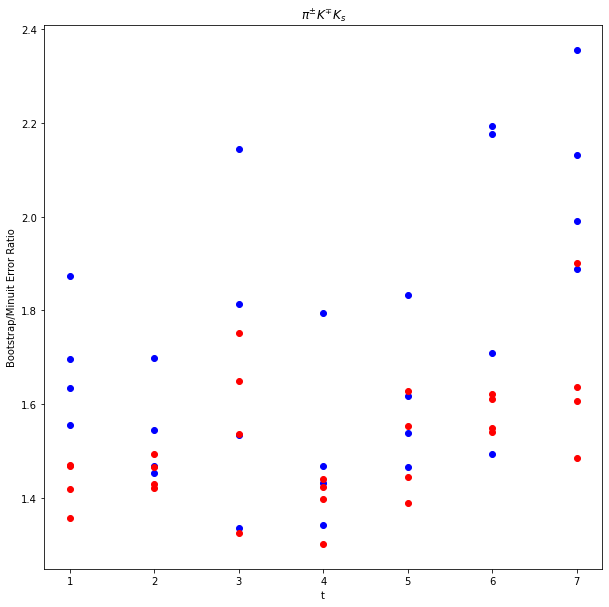

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(df_pipkmks['t'], df_pipkmks['bs_rel_err']/df_pipkmks['nom_rel_err'], c='b')
ax.set_title('$\pi^{\pm}K^{\mp}K_s$')
ax.set_xlabel('t')
ax.set_ylabel('Bootstrap/Minuit Error Ratio')

ax.scatter(df_pimkpks['t'], df_pimkpks['bs_rel_err']/df_pimkpks['nom_rel_err'], c='r')
plt.show()

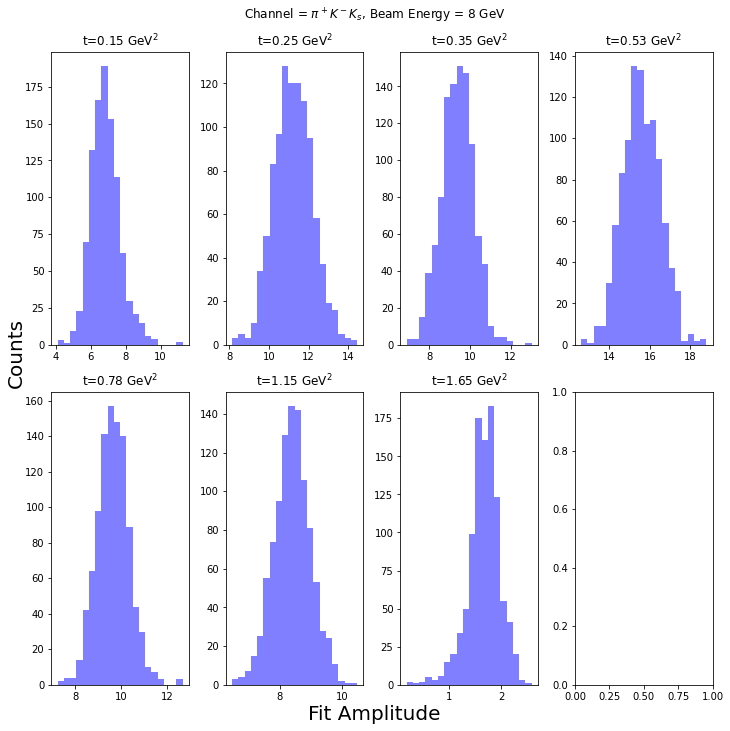

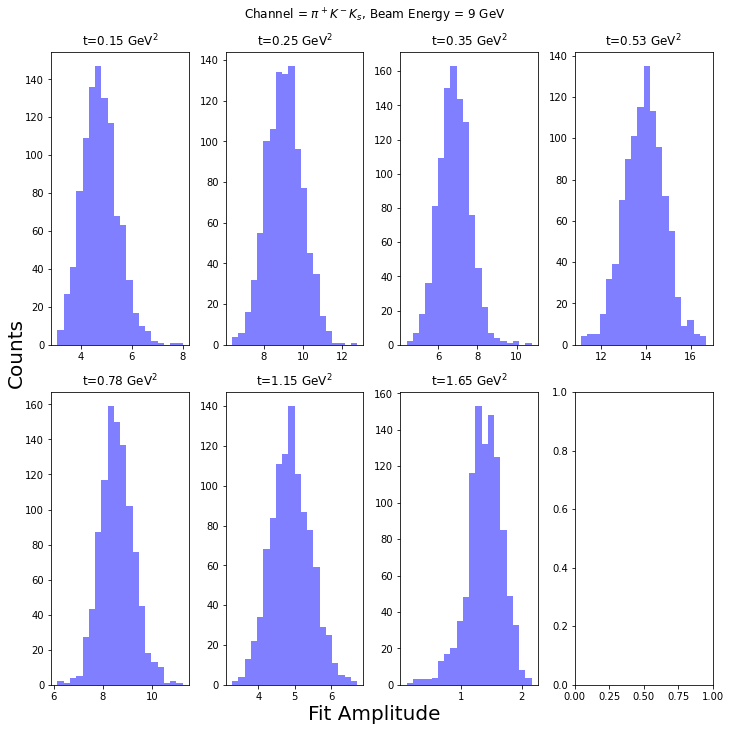

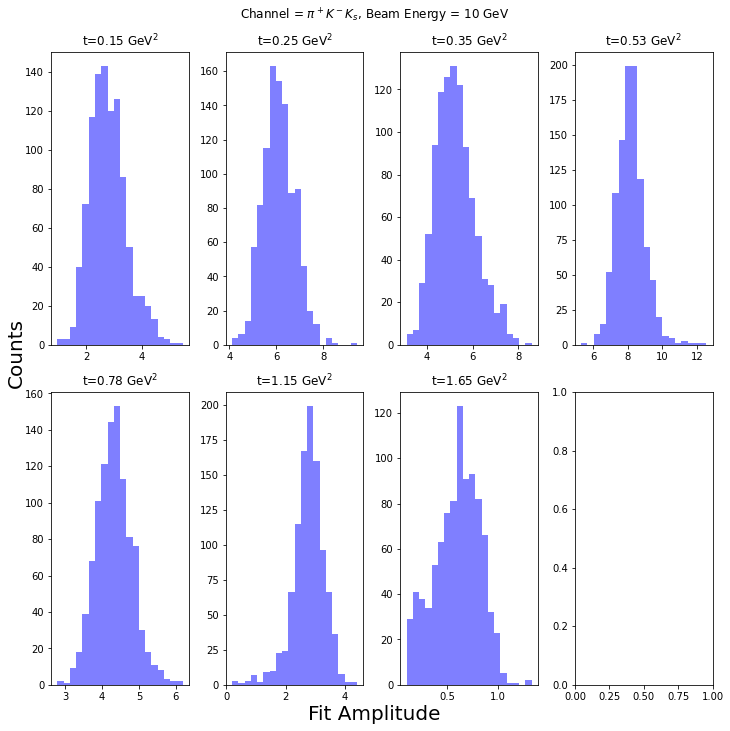

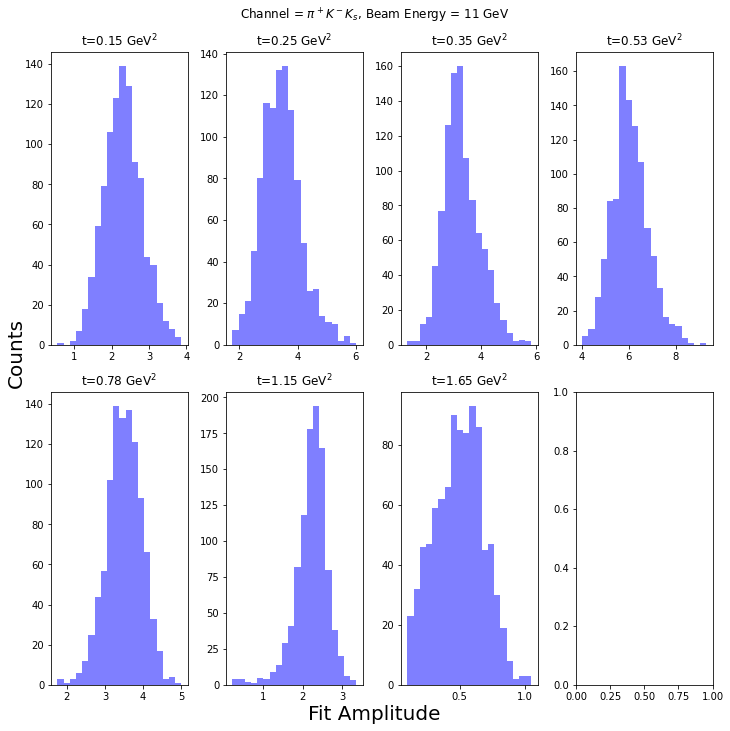

In [8]:
for e in range(8, 12):
    fig, axs = plt.subplots(2,4,figsize=(10, 10))
    fig.suptitle(f'Channel = $\pi^+K^-K_s$, Beam Energy = {e} GeV')
    fig.text(0.5, -0.01, 'Fit Amplitude', fontsize=20, ha='center')
    fig.text(-0.01, 0.5, 'Counts', va='center', fontsize=20, rotation='vertical')
    fig.set_tight_layout(True)
    fig.set_facecolor('white')
    for t in range(1, 8):
        t_middle = constants.T_CUT_DICT[t][0] + (constants.T_WIDTH_DICT[t] / 2)
        row = (t-1) // 4
        col = (t-1) % 4
        ax = axs[row, col]
        ax.set_title(f't={t_middle:0.2f} GeV$^2$')
        # ax.set_xlabel('Fit Amplitude')
        # ax.set_ylabel('Frequency')
        ax.hist(bs_grouped_pipkmks.get_group((e, t))['amplitude'], bins=20, color='b', alpha=0.5, label='Bootstrap')
    fig.savefig(f'/work/halld/home/viducic/scripts/crosssection/plots/bootstrapped_fits/pipkmks_e{e}.png', facecolor=fig.get_facecolor(), transparent=False)
plt.show()

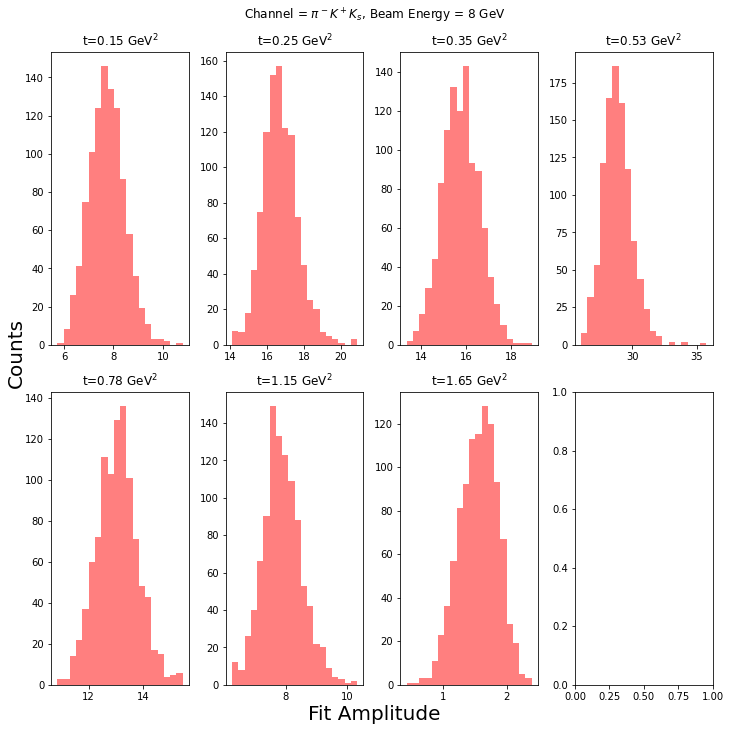

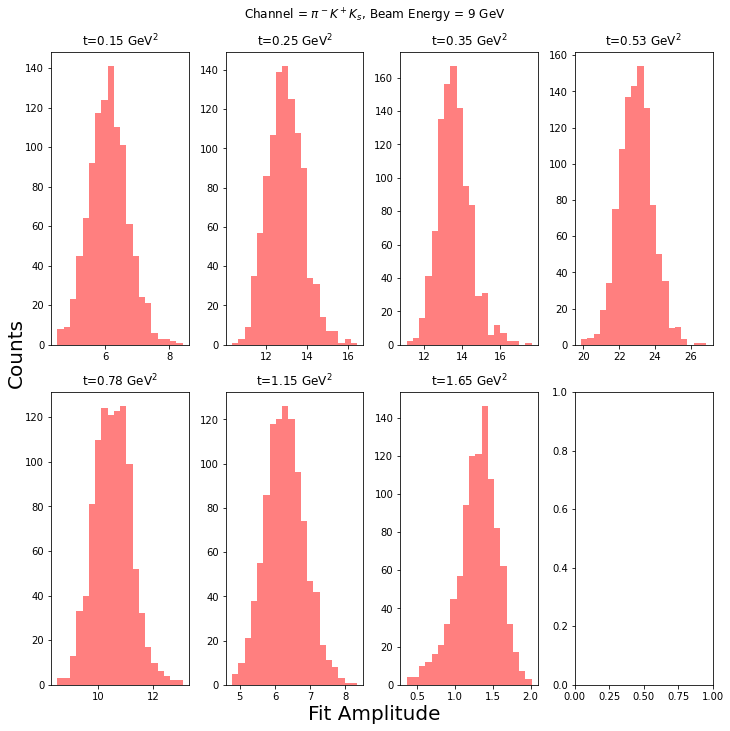

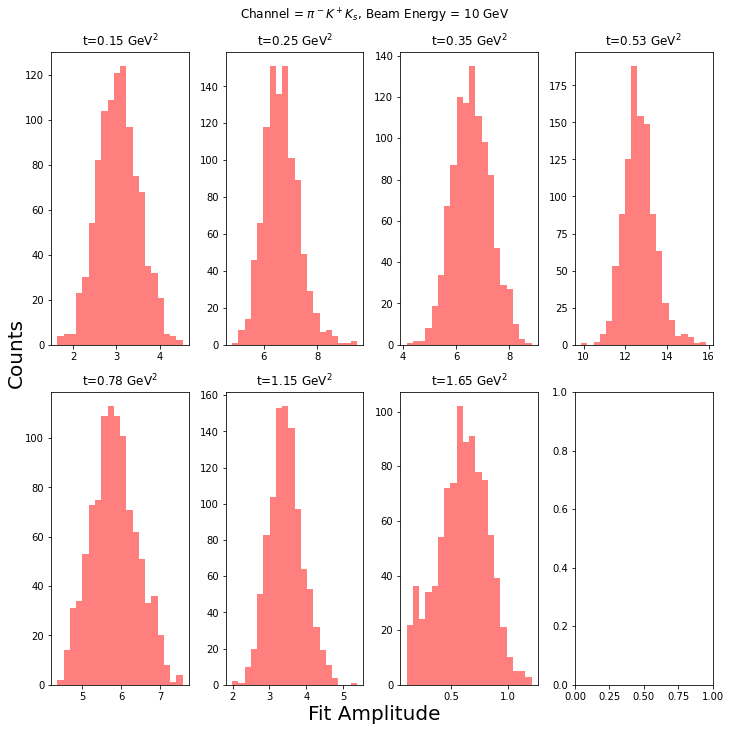

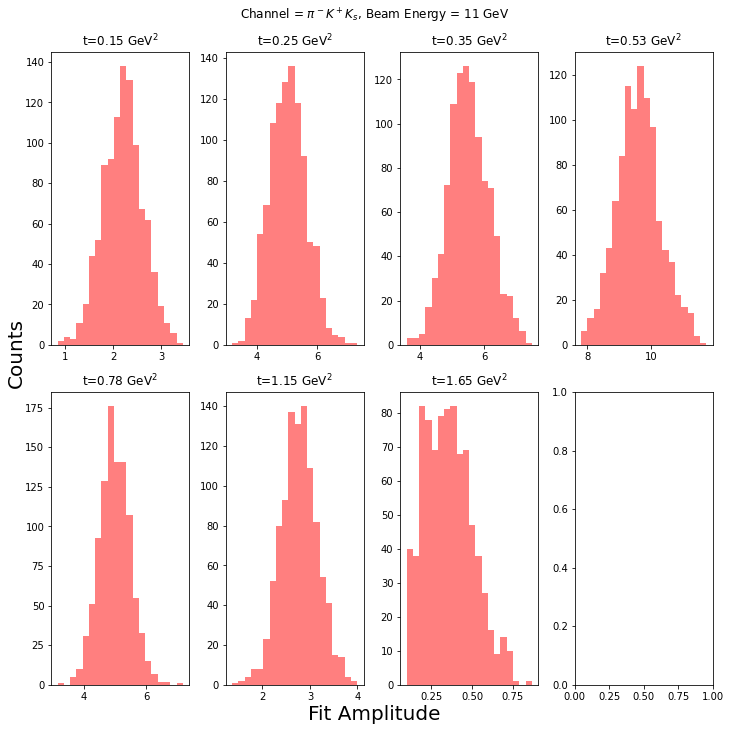

In [9]:
for e in range(8, 12):
    fig, axs = plt.subplots(2,4,figsize=(10, 10))
    fig.suptitle(f'Channel = $\pi^-K^+K_s$, Beam Energy = {e} GeV')
    fig.text(0.5, -0.01, 'Fit Amplitude', fontsize=20, ha='center')
    fig.text(-0.01, 0.5, 'Counts', va='center', fontsize=20, rotation='vertical')
    fig.set_tight_layout(True)
    fig.set_facecolor('white')
    for t in range(1, 8):
        t_middle = constants.T_CUT_DICT[t][0] + (constants.T_WIDTH_DICT[t] / 2)
        row = (t-1) // 4
        col = (t-1) % 4
        ax = axs[row, col]
        ax.set_title(f't={t_middle:0.2f} GeV$^2$')
        # ax.set_xlabel('Fit Amplitude')
        # ax.set_ylabel('Frequency')
        ax.hist(bs_grouped_pimkpks.get_group((e, t))['amplitude'], bins=20, color='r', alpha=0.5, label='Bootstrap')
    fig.savefig(f'/work/halld/home/viducic/scripts/crosssection/plots/bootstrapped_fits/pimkpks_e{e}.png', facecolor=fig.get_facecolor(), transparent=False)
plt.show()